In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from acquire import get_titanic_data, get_telco_data
from prepare import prep_titanic, prep_telco, split_data, prep_titanic_age

# Decision Tree Modeling
What is it?
- a machine learning algorithm used for predicting categorical target variables
- Pipeline: Plan - Acquire - Prepare - Explore - **Model** - Deliver

How?
- acquire, prepare, explore our data
- split data for modeling
    - x (features) is always a dataframe
    - y (target) will be one var and a series
- build models on train
    - create rules based on our input data
- evaluate models on validate
    - see how our rules work on unseen data
- pick best of the best model, and evaluate bestest model on test

## Exercises

Using the titanic data

In [2]:
titanic = get_titanic_data()
titan = prep_titanic(titanic)
ttn_train, ttn_v, ttn_t = split_data(titan,'survived')
ttn_train.sample()

csv file found and loaded
data cleaned and prepped
data split
train -> (534, 11); 59.93%
validate -> (178, 11); 19.98%
test -> (179, 11); 20.09%


,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
754,1,2,female,1,2,65.0,S,0,0,0,1


In [3]:
Xtr = ttn_train.drop(columns=['survived','sex','embarked'])
Xv = ttn_v.drop(columns=['survived','sex','embarked'])
Xt = ttn_t.drop(columns=['survived','sex','embarked'])
ytr = ttn_train.survived
yv = ttn_v.survived
yt = ttn_t.survived

In [4]:
Xtr.sample()

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
487,1,0,0,29.7,1,1,0,0


In [5]:
ytr.sample()

255    1
Name: survived, dtype: int64

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevalent class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



In [6]:
ytr.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [7]:
baseline = (ytr==0).mean()
baseline

0.6161048689138576

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [8]:
tree1 = DecisionTreeClassifier(max_depth=3,random_state=42)
tree1 = tree1.fit(Xtr,ytr)
y_pred = tree1.predict(Xtr)

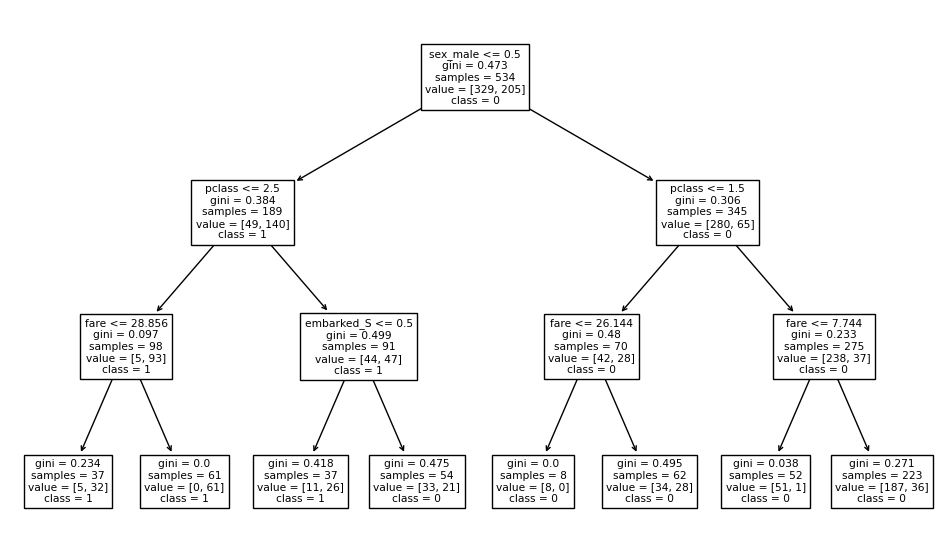

In [9]:
plt.figure(figsize=(12,7))
plot_tree(tree1, feature_names=Xtr.columns, class_names=['0','1'])
plt.show()

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.



In [10]:
tree1.score(Xtr,ytr)

0.8089887640449438

In [11]:
cm = confusion_matrix(ytr,y_pred,labels=tree1.classes_)
cm

array([[313,  16],
       [ 86, 119]])

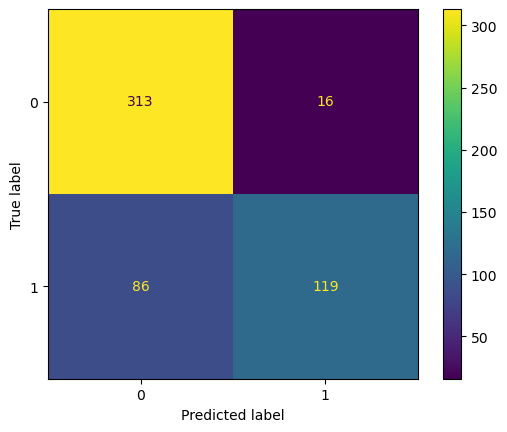

In [12]:
cmd = ConfusionMatrixDisplay(cm, display_labels=tree1.classes_)
cmd.plot()
plt.show()

In [13]:
print(classification_report(ytr, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       329
           1       0.88      0.58      0.70       205

    accuracy                           0.81       534
   macro avg       0.83      0.77      0.78       534
weighted avg       0.82      0.81      0.80       534



In [14]:
report = classification_report(ytr, y_pred, output_dict=True)
print("Tree of 3 depth")
pd.DataFrame(report)

Tree of 3 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.784461,0.881481,0.808989,0.832971,0.821707
recall,0.951368,0.580488,0.808989,0.765928,0.808989
f1-score,0.859890,0.700000,0.808989,0.779945,0.798509
support,329.000000,205.000000,0.808989,534.000000,534.000000


4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [15]:
TN, FP, FN, TP = confusion_matrix(ytr, y_pred).ravel()
TN, FP, FN, TP

(313, 16, 86, 119)

In [16]:
act_neg = TN + FP
act_pos = FN + TP
print(f"Actual Negative: {act_neg}")
print(f"Actual Positive: {act_pos}")
print(ytr.value_counts())

Actual Negative: 329
Actual Positive: 205
0    329
1    205
Name: survived, dtype: int64


In [17]:
ALL = TN + FP + FN + TP
acc = (TP+TN)/ALL
tru_pos = rec = TP/(TP+FN)
fal_pos = FP/(FP+TN)
tru_neg = TN/(FP+TN)
fal_neg = FN/(TP+FN)
prc = TP/(TP+FP)
f1_score = 2*(prc*rec)/(prc+rec)
sup_pos = TP+FN
sup_neg = FP+TN

print(f"Accuracy: {acc}")
print(f"True Pos Rate: {tru_pos}")
print(f"False Pos Rate: {fal_pos}")
print(f"True Neg Rate: {tru_neg}")
print(f"False Neg Rate: {fal_neg}")
print(f"Precision: {prc}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1_score}")
print(f"Support Pos (1): {sup_pos}")
print(f"Support Neg (0): {sup_neg}")

Accuracy: 0.8089887640449438
True Pos Rate: 0.5804878048780487
False Pos Rate: 0.0486322188449848
True Neg Rate: 0.9513677811550152
False Neg Rate: 0.4195121951219512
Precision: 0.8814814814814815
Recall: 0.5804878048780487
F1 Score: 0.7
Support Pos (1): 205
Support Neg (0): 329


5. Run through steps 2-4 using a different max_depth value.



In [18]:
for i in range(1,21):
    # model
    tree = DecisionTreeClassifier(max_depth=i,random_state=42)
    tree = tree.fit(Xtr,ytr)
    y_pred = tree.predict(Xtr)
    # report
    report = classification_report(ytr, y_pred, output_dict=True)
    print(f'Tree max depth:{i}')
    print(pd.DataFrame(report))
    print()

Tree max depth:1
                    0           1  accuracy   macro avg  weighted avg
precision    0.811594    0.740741  0.786517    0.776167      0.784394
recall       0.851064    0.682927  0.786517    0.766995      0.786517
f1-score     0.830861    0.710660  0.786517    0.770760      0.784716
support    329.000000  205.000000  0.786517  534.000000    534.000000

Tree max depth:2
                    0           1  accuracy   macro avg  weighted avg
precision    0.811594    0.740741  0.786517    0.776167      0.784394
recall       0.851064    0.682927  0.786517    0.766995      0.786517
f1-score     0.830861    0.710660  0.786517    0.770760      0.784716
support    329.000000  205.000000  0.786517  534.000000    534.000000

Tree max depth:3
                    0           1  accuracy   macro avg  weighted avg
precision    0.784461    0.881481  0.808989    0.832971      0.821707
recall       0.951368    0.580488  0.808989    0.765928      0.808989
f1-score     0.859890    0.700000  0.

6. Which model performs better on your in-sample data?



In [19]:
# max depth of 12+ has best accuracy

7. Which model performs best on your out-of-sample data, the validate set?



In [20]:
metrics = []
for i in range(1,21):
    # model
    tree = DecisionTreeClassifier(max_depth=i,random_state=42)
    tree = tree.fit(Xtr,ytr)
    # accuracies
    ytr_pred = tree.score(Xtr,ytr)
    yv_pred = tree.score(Xv,yv)
    # table-ize
    output = {
        'max_depth':i,
        'train_acc':ytr_pred,
        'val_acc':yv_pred
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df['diff'] = df.train_acc - df.val_acc
df

,max_depth,train_acc,val_acc,diff
0,1,0.786517,0.797753,-0.011236
1,2,0.786517,0.797753,-0.011236
2,3,0.808989,0.837079,-0.028090
3,4,0.823970,0.831461,-0.007491
4,5,0.848315,0.825843,0.022472
5,6,0.874532,0.831461,0.043071
6,7,0.889513,0.825843,0.063670
7,8,0.902622,0.808989,0.093633
8,9,0.910112,0.814607,0.095506
9,10,0.923221,0.803371,0.119850


In [21]:
df[df.val_acc==df.val_acc.max()]

,max_depth,train_acc,val_acc,diff
2,3,0.808989,0.837079,-0.02809


In [22]:
final_tree = DecisionTreeClassifier(max_depth=3,random_state=42)
final_tree = final_tree.fit(Xt,yt)
yt_acc = final_tree.score(Xt,yt)
yt_acc

0.8212290502793296

In [23]:
baseline,yt_acc

(0.6161048689138576, 0.8212290502793296)

In [24]:
from sklearn.tree import export_text

print(export_text(tree1, feature_names=Xtr.columns.to_list()))

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 28.86
|   |   |   |--- class: 1
|   |   |--- fare >  28.86
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- embarked_S <= 0.50
|   |   |   |--- class: 1
|   |   |--- embarked_S >  0.50
|   |   |   |--- class: 0
|--- sex_male >  0.50
|   |--- pclass <= 1.50
|   |   |--- fare <= 26.14
|   |   |   |--- class: 0
|   |   |--- fare >  26.14
|   |   |   |--- class: 0
|   |--- pclass >  1.50
|   |   |--- fare <= 7.74
|   |   |   |--- class: 0
|   |   |--- fare >  7.74
|   |   |   |--- class: 0



Work through these same exercises using the Telco dataset.
Experiment with this model on other datasets with a higher number of output classes.

In [25]:
telco = get_telco_data()
tel = prep_telco(telco)
tel_tr, tel_v, tel_t = split_data(tel,'churn')
tel_tr.sample()

csv file found and loaded
data cleaned and prepped
data split
train -> (4225, 47); 59.99%
validate -> (1409, 47); 20.01%
test -> (1409, 47); 20.01%


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
722,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,1,0,0,1,1,0,0


In [26]:
tel_obj = tel_tr.select_dtypes(include='object').columns.to_list()
tel_obj.append('churned')
Xtr = tel_tr.drop(columns=tel_obj)
Xv = tel_v.drop(columns=tel_obj)
Xt = tel_t.drop(columns=tel_obj)
ytr = tel_tr.churned
yv = tel_v.churned
yt = tel_t.churned

In [27]:
Xtr.sample()

,senior_citizen,tenure,monthly_charges,total_charges,Female,partnered,has_dependents,has_phone_service,does_paperless_billing,multiple_lines_No phone service,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
1655,0,55,85.1,4657.95,1,1,1,1,1,0,...,1,0,1,0,1,0,0,0,0,0


In [28]:
ytr.sample()

3122    0
Name: churned, dtype: int64

In [29]:
ytr.value_counts()

0    3104
1    1121
Name: churned, dtype: int64

In [30]:
baseline = (ytr==0).mean()
baseline

0.7346745562130178

In [31]:
tree2 = DecisionTreeClassifier(max_depth=3,random_state=42)
tree2 = tree2.fit(Xtr,ytr)
y_pred = tree2.predict(Xtr)

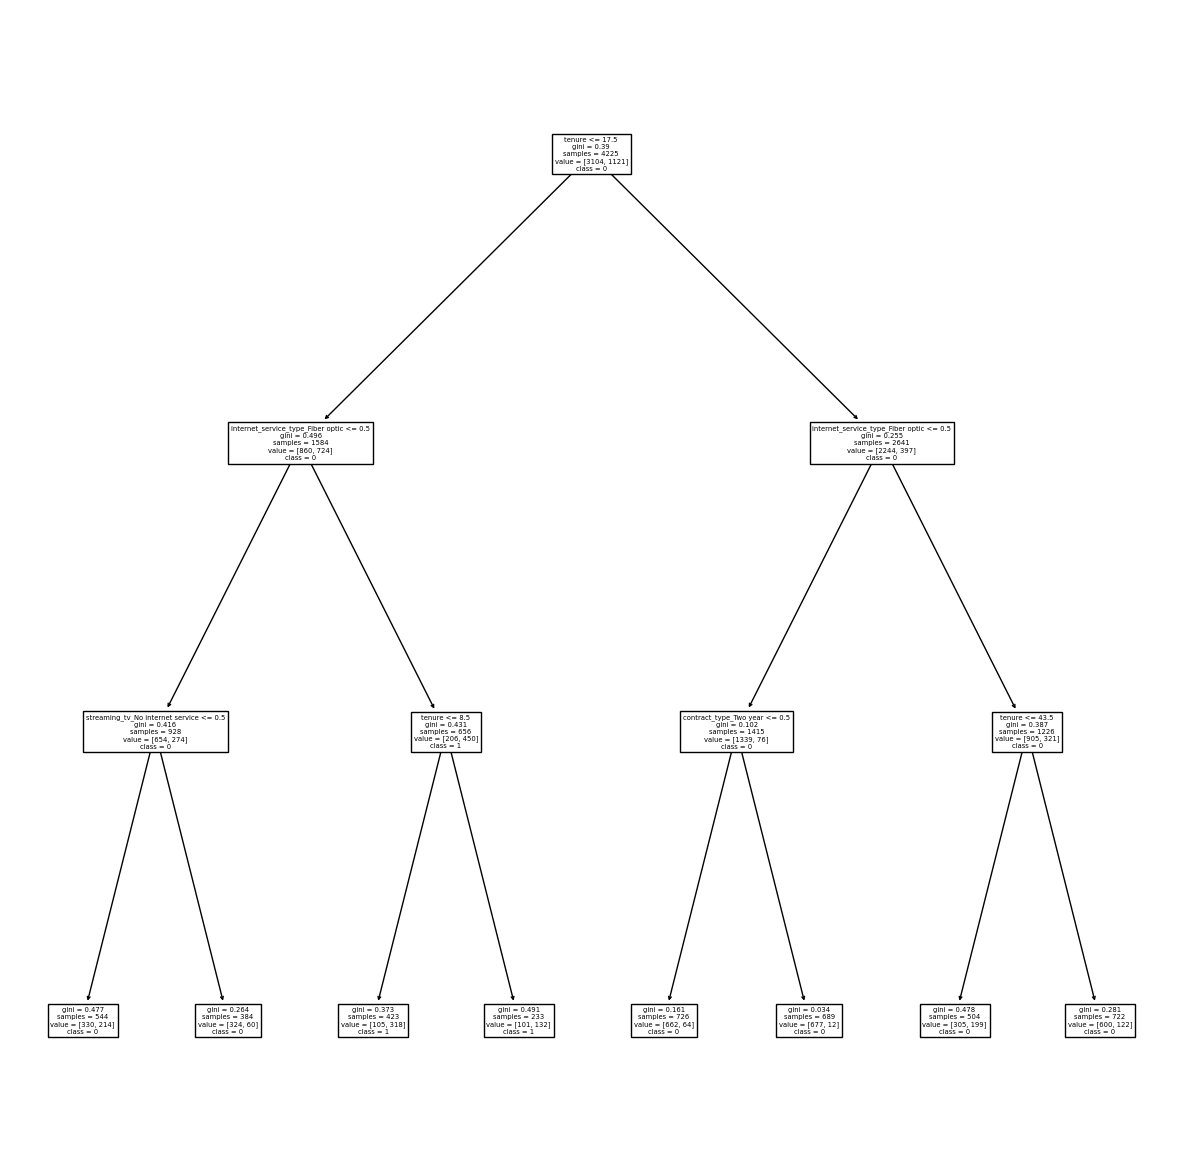

In [32]:
plt.figure(figsize=(15,15))
plot_tree(tree2,feature_names=Xtr.columns,class_names=['0','1'])
plt.show()

In [33]:
tree2.score(Xtr,ytr)

0.7924260355029585

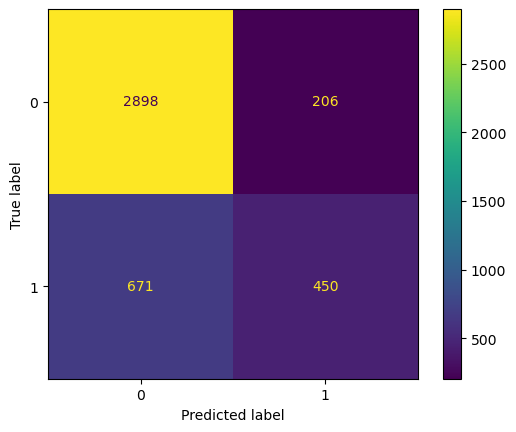

In [34]:
cm = confusion_matrix(ytr, y_pred, labels=tree2.classes_)
cmd = ConfusionMatrixDisplay(cm,display_labels=tree2.classes_)
cmd.plot()
plt.show()

In [35]:
print(classification_report(ytr,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3104
           1       0.69      0.40      0.51      1121

    accuracy                           0.79      4225
   macro avg       0.75      0.67      0.69      4225
weighted avg       0.78      0.79      0.77      4225



In [36]:
report = classification_report(ytr,y_pred,output_dict=True)
print('Tree max depth: 3')
pd.DataFrame(report)

Tree max depth: 3


,0,1,accuracy,macro avg,weighted avg
precision,0.811992,0.685976,0.792426,0.748984,0.778557
recall,0.933634,0.401427,0.792426,0.667531,0.792426
f1-score,0.868575,0.506472,0.792426,0.687523,0.772500
support,3104.000000,1121.000000,0.792426,4225.000000,4225.000000


In [37]:
cm

array([[2898,  206],
       [ 671,  450]])

In [38]:
TN,FP,FN,TP = cm.ravel()
TN,FP,FN,TP

(2898, 206, 671, 450)

In [39]:
act_neg = TN + FP
act_pos = FN + TP
print(f"Actual Negative: {act_neg}")
print(f"Actual Positive: {act_pos}")
print(ytr.value_counts())

Actual Negative: 3104
Actual Positive: 1121
0    3104
1    1121
Name: churned, dtype: int64


In [40]:
ALL = TN + FP + FN + TP
acc = (TP+TN)/ALL
tru_pos = rec = TP/(TP+FN)
fal_pos = FP/(FP+TN)
tru_neg = TN/(FP+TN)
fal_neg = FN/(TP+FN)
prc = TP/(TP+FP)
f1_score = 2*(prc*rec)/(prc+rec)
sup_pos = TP+FN
sup_neg = FP+TN

print(f"Accuracy: {acc}")
print(f"True Pos Rate: {tru_pos}")
print(f"False Pos Rate: {fal_pos}")
print(f"True Neg Rate: {tru_neg}")
print(f"False Neg Rate: {fal_neg}")
print(f"Precision: {prc}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1_score}")
print(f"Support Pos (1): {sup_pos}")
print(f"Support Neg (0): {sup_neg}")

Accuracy: 0.7924260355029585
True Pos Rate: 0.40142729705619984
False Pos Rate: 0.0663659793814433
True Neg Rate: 0.9336340206185567
False Neg Rate: 0.5985727029438002
Precision: 0.6859756097560976
Recall: 0.40142729705619984
F1 Score: 0.5064715813168261
Support Pos (1): 1121
Support Neg (0): 3104


In [41]:
metrics = []
for i in range(1,26):
    # model
    tree = DecisionTreeClassifier(max_depth=i,random_state=42)
    tree = tree.fit(Xtr,ytr)
    # accuracies
    ytr_acc = tree.score(Xtr,ytr)
    yv_acc = tree.score(Xv,yv)
    output = {
        'max_depth':i,
        'train_acc':ytr_acc,
        'val_acc':yv_acc
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df['diff'] = df.train_acc - df.val_acc
df

,max_depth,train_acc,val_acc,diff
0,1,0.734675,0.734564,0.000111
1,2,0.792426,0.779986,0.012440
2,3,0.792426,0.779986,0.012440
3,4,0.798343,0.770759,0.027584
4,5,0.816095,0.769340,0.046755
5,6,0.831953,0.775727,0.056225
6,7,0.842604,0.751597,0.091007
7,8,0.861302,0.751597,0.109705
8,9,0.880000,0.743790,0.136210
9,10,0.902485,0.735273,0.167212


In [42]:
df[df.val_acc==df.val_acc.max()]

,max_depth,train_acc,val_acc,diff
1,2,0.792426,0.779986,0.01244
2,3,0.792426,0.779986,0.01244


In [43]:
Xtr.columns

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'Female', 'partnered', 'has_dependents', 'has_phone_service',
       'does_paperless_billing', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check'],
      dtype='object')

In [44]:
features = ['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
            'Female', 'partnered', 'has_dependents', 'has_phone_service',
            'does_paperless_billing', 'multiple_lines_No phone service',
            'multiple_lines_Yes', 'online_security_No internet service',
            'online_security_Yes', 'online_backup_No internet service',
            'online_backup_Yes', 'device_protection_No internet service',
            'device_protection_Yes', 'tech_support_No internet service',
            'tech_support_Yes', 'streaming_tv_No internet service',
            'streaming_tv_Yes', 'streaming_movies_No internet service',
            'streaming_movies_Yes', 'contract_type_One year',
            'contract_type_Two year', 'internet_service_type_Fiber optic',
            'internet_service_type_None', 'payment_type_Credit card (automatic)',
            'payment_type_Electronic check', 'payment_type_Mailed check']

In [45]:
metrics = []
for i in range(1,26):
    # model
    tree = DecisionTreeClassifier(max_depth=i,random_state=42)
    tree = tree.fit(Xtr[features],ytr)
    # accuracies
    ytr_acc = tree.score(Xtr[features],ytr)
    yv_acc = tree.score(Xv[features],yv)
    output = {
        'max_depth':i,
        'train_acc':ytr_acc,
        'val_acc':yv_acc
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df['diff'] = df.train_acc - df.val_acc
df

,max_depth,train_acc,val_acc,diff
0,1,0.734675,0.734564,0.000111
1,2,0.792426,0.779986,0.012440
2,3,0.792426,0.779986,0.012440
3,4,0.798343,0.770759,0.027584
4,5,0.816095,0.769340,0.046755
5,6,0.831953,0.775727,0.056225
6,7,0.842604,0.751597,0.091007
7,8,0.861302,0.751597,0.109705
8,9,0.880000,0.743790,0.136210
9,10,0.902485,0.735273,0.167212


In [46]:
df[df.val_acc==df.val_acc.max()]

,max_depth,train_acc,val_acc,diff
1,2,0.792426,0.779986,0.01244
2,3,0.792426,0.779986,0.01244


In [47]:
final_tree = DecisionTreeClassifier(max_depth=2,random_state=42)
final_tree = final_tree.fit(Xt,yt)
yt_acc = final_tree.score(Xt,yt)
yt_acc

0.794180269694819

In [48]:
baseline,yt_acc

(0.7346745562130178, 0.794180269694819)

test titanic w/null-age imputed based on mean

In [49]:
t_age = get_titanic_data()
t_age = prep_titanic_age(t_age)
ttr,tv,tt = split_data(t_age,'survived')
ttr.sample()

csv file found and loaded
data cleaned and prepped
data split
train -> (534, 12); 59.93%
validate -> (178, 12); 19.98%
test -> (179, 12); 20.09%


,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
330,1,3,female,29.699118,2,0,23.25,Q,0,0,1,0


In [50]:
Xtr = ttr.drop(columns=['survived','sex','embarked'])
Xv = tv.drop(columns=['survived','sex','embarked'])
Xt = tt.drop(columns=['survived','sex','embarked'])
ytr = ttr.survived
yv = tv.survived
yt = tt.survived

In [51]:
Xtr.sample()

,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
227,3,20.5,0,0,7.25,1,1,0,1


In [52]:
ytr.sample()

697    1
Name: survived, dtype: int64

In [53]:
baseline = (ytr==0).mean()
baseline

0.6161048689138576

In [54]:
metrics = []
for i in range(1,21):
    # model
    tree = DecisionTreeClassifier(max_depth=i,random_state=42)
    tree = tree.fit(Xtr,ytr)
    # accuracies
    ytr_pred = tree.score(Xtr,ytr)
    yv_pred = tree.score(Xv,yv)
    # table-ize
    output = {
        'max_depth':i,
        'train_acc':ytr_pred,
        'val_acc':yv_pred
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df['diff'] = df.train_acc - df.val_acc
df

,max_depth,train_acc,val_acc,diff
0,1,0.786517,0.797753,-0.011236
1,2,0.803371,0.808989,-0.005618
2,3,0.825843,0.848315,-0.022472
3,4,0.842697,0.831461,0.011236
4,5,0.859551,0.831461,0.028090
5,6,0.872659,0.831461,0.041199
6,7,0.891386,0.808989,0.082397
7,8,0.910112,0.842697,0.067416
8,9,0.934457,0.808989,0.125468
9,10,0.945693,0.831461,0.114232


In [55]:
df[df.val_acc==df.val_acc.max()]

,max_depth,train_acc,val_acc,diff
2,3,0.825843,0.848315,-0.022472


In [56]:
final_tree = DecisionTreeClassifier(max_depth=3,random_state=42)
final_tree = final_tree.fit(Xt,yt)
yt_acc = final_tree.score(Xt,yt)
yt_acc

0.8324022346368715

In [57]:
baseline,yt_acc

(0.6161048689138576, 0.8324022346368715)

try titanic w/null-age dropped but non-null-age kept

In [58]:
df = get_titanic_data()
# t_age = prep_titanic_age(t_age)
df = df.drop(columns=['class','deck','embark_town','passenger_id'])
df['embarked'] = df.embarked.fillna(value='S')
df = df.dropna()
dummy_df = pd.get_dummies(df[['sex','embarked']], dummy_na=False, drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
ttr,tv,tt = split_data(df,'survived')
ttr.sample()

csv file found and loaded
data split
train -> (428, 12); 59.94%
validate -> (143, 12); 20.03%
test -> (143, 12); 20.03%


,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
228,0,2,male,18.0,0,0,13.0,S,1,1,0,1


In [59]:
Xtr = ttr.drop(columns=['survived','sex','embarked'])
Xv = tv.drop(columns=['survived','sex','embarked'])
Xt = tt.drop(columns=['survived','sex','embarked'])
ytr = ttr.survived
yv = tv.survived
yt = tt.survived

In [60]:
Xtr.sample()

,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
883,2,28.0,0,0,10.5,1,1,0,1


In [61]:
ytr.sample()

802    1
Name: survived, dtype: int64

In [62]:
baseline = (ytr==0).mean()
baseline

0.5934579439252337

In [63]:
metrics = []
for i in range(1,21):
    # model
    tree = DecisionTreeClassifier(max_depth=i,random_state=42)
    tree = tree.fit(Xtr,ytr)
    # accuracies
    ytr_pred = tree.score(Xtr,ytr)
    yv_pred = tree.score(Xv,yv)
    # table-ize
    output = {
        'max_depth':i,
        'train_acc':ytr_pred,
        'val_acc':yv_pred
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df['diff'] = df.train_acc - df.val_acc
df

,max_depth,train_acc,val_acc,diff
0,1,0.782710,0.769231,0.013480
1,2,0.810748,0.769231,0.041517
2,3,0.836449,0.804196,0.032253
3,4,0.857477,0.776224,0.081253
4,5,0.866822,0.769231,0.097592
5,6,0.885514,0.783217,0.102297
6,7,0.906542,0.783217,0.123325
7,8,0.922897,0.783217,0.139680
8,9,0.946262,0.776224,0.170038
9,10,0.957944,0.769231,0.188713


In [64]:
df[df.val_acc==df.val_acc.max()]

,max_depth,train_acc,val_acc,diff
2,3,0.836449,0.804196,0.032253


In [65]:
final_tree = DecisionTreeClassifier(max_depth=3,random_state=42)
final_tree = final_tree.fit(Xt,yt)
yt_acc = final_tree.score(Xt,yt)
yt_acc

0.8531468531468531

In [66]:
baseline,yt_acc

(0.5934579439252337, 0.8531468531468531)